In [146]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth, kmeans_plusplus
from sklearn.datasets import make_blobs  
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('empleados.csv', delimiter=";")

In [148]:
print(df.head())

      Nombre       Sexo Estado_Civil  Edad  Experiencia  Salario Gerencia   
0  Alexandro  Masculino   Soltero(a)    22            3     2423       No  \
1     Felipa   Femenino   Soltero(a)    26            5     2639       No   
2     Daniel  Masculino    Casado(a)    35           10     3122       No   
3       John  Masculino    Casado(a)    35           13     3431       Sí   
4    Ruperta   Femenino    Casado(a)    54           18     3962       No   

           Departamento  
0            Publicidad  
1             Comercial  
2             Comercial  
3  Servicios al cliente  
4              Producto  


In [149]:
df

,Nombre,Sexo,Estado_Civil,Edad,Experiencia,Salario,Gerencia,Departamento
0,Alexandro,Masculino,Soltero(a),22,3,2423,No,Publicidad
1,Felipa,Femenino,Soltero(a),26,5,2639,No,Comercial
2,Daniel,Masculino,Casado(a),35,10,3122,No,Comercial
3,John,Masculino,Casado(a),35,13,3431,Sí,Servicios al cliente
4,Ruperta,Femenino,Casado(a),54,18,3962,No,Producto
...,...,...,...,...,...,...,...,...
138,Hernando,Masculino,Divorciado(a),29,4,2510,No,IT
139,Vito,Masculino,Divorciado(a),22,4,2530,No,Producto
140,Jose,Masculino,Casado(a),30,6,2760,No,Servicios al cliente
141,Marcelo,Masculino,Divorciado(a),44,15,3616,No,IT


In [150]:
df2 = df[['Sexo', 'Salario', 'Experiencia', 'Gerencia']]
df2

,Sexo,Salario,Experiencia,Gerencia
0,Masculino,2423,3,No
1,Femenino,2639,5,No
2,Masculino,3122,10,No
3,Masculino,3431,13,Sí
4,Femenino,3962,18,No
...,...,...,...,...
138,Masculino,2510,4,No
139,Masculino,2530,4,No
140,Masculino,2760,6,No
141,Masculino,3616,15,No


In [151]:
df2 = df2.dropna()
df2

,Sexo,Salario,Experiencia,Gerencia
0,Masculino,2423,3,No
1,Femenino,2639,5,No
2,Masculino,3122,10,No
3,Masculino,3431,13,Sí
4,Femenino,3962,18,No
...,...,...,...,...
138,Masculino,2510,4,No
139,Masculino,2530,4,No
140,Masculino,2760,6,No
141,Masculino,3616,15,No


Todas las lineas tienen algun valor por lo que puedes empezar a sacar los valores estadisticos

In [152]:
ConteoSexo = df2['Sexo'].value_counts()
ConteoGerencia = df2['Gerencia'].value_counts()
print('La cantidad de hombres y mujeres es: ', ConteoSexo)
print('La cantidad de gerencias', ConteoGerencia)

La cantidad de hombres y mujeres es:  Sexo
Femenino     77
Masculino    66
Name: count, dtype: int64
La cantidad de gerencias Gerencia
No    131
Sí     12
Name: count, dtype: int64


Se analizara si se gana mas dinero con una gerencia o no

In [153]:
Salario_sin_ger = df.loc[df['Gerencia'] != 'Si', 'Salario'].mean()
Salario_con_ger = df.loc[df['Gerencia'] != 'No', 'Salario'].mean()
print('El salario promedio sin tener una gerencia: ', round(Salario_sin_ger))
print ( 'El salario promedio con una gerencia: ', round(Salario_con_ger))

El salario promedio sin tener una gerencia:  2779
El salario promedio con una gerencia:  3174


Primero analizaremos removiendo las gerencias, ya que un analisis anterior se encontro que el salario aumenta al poseer una gerencia

In [154]:
df3 = df2.loc[df['Gerencia'] != 'Sí'].copy()
df3

,Sexo,Salario,Experiencia,Gerencia
0,Masculino,2423,3,No
1,Femenino,2639,5,No
2,Masculino,3122,10,No
4,Femenino,3962,18,No
5,Femenino,2564,4,No
...,...,...,...,...
138,Masculino,2510,4,No
139,Masculino,2530,4,No
140,Masculino,2760,6,No
141,Masculino,3616,15,No


El Df3 tiene los datos de salarios y genero y experiencia para continuar un analisis a mayor profundidad

Text(0.5, 1.0, 'Femenino')

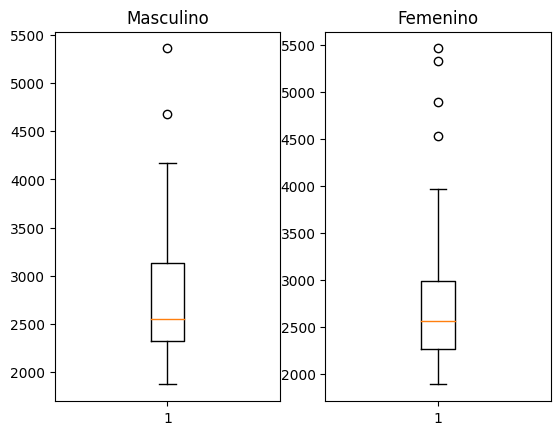

In [155]:
salarioMasculino = df3.loc[df3['Sexo'] != 'Femenino',['Salario']]
plt.subplot(1,2,1)
plt.boxplot(salarioMasculino)
plt.title("Masculino")
salarioFemenino = df3.loc[df3['Sexo'] != 'Masculino',['Salario']]
plt.subplot(1,2,2)
plt.boxplot(salarioFemenino)
plt.title("Femenino")

Aqui empezamos a sacar los datos estadisticos

In [156]:
maxF = salarioFemenino.max()
minF = salarioFemenino.min()
meanF = salarioFemenino.mean()
stdF = salarioFemenino.std()
varF = salarioFemenino.var()

maxM = salarioMasculino.max()
minM = salarioMasculino.min()
meanM = salarioMasculino.mean()
stdM = salarioMasculino.std()
varM  = salarioMasculino.var()

dataMostrar = { 'Maximo': [maxF, maxM],
                'Minimo': [minF, minM],
                'Media': [meanF, meanM],
                'Desviacion': [stdF, stdM],
                'Varianza': [varF, varM]}
df_resultados = pd.DataFrame(dataMostrar)
df_resultados = df_resultados.transpose()
df_resultados['Masculino'] = df_resultados[0].astype(int)
df_resultados['Femenino'] = df_resultados[1].astype(int)
df_resultados


C:\Users\Daniel\AppData\Local\Temp\ipykernel_12540\3485252891.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df_resultados['Masculino'] = df_resultados[0].astype(int)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12540\3485252891.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df_resultados['Femenino'] = df_resultados[1].astype(int)


,0,1,Masculino,Femenino
Maximo,Salario 5462 dtype: int64,Salario 5360 dtype: int64,5462,5360
Minimo,Salario 1887 dtype: int64,Salario 1872 dtype: int64,1887,1872
Media,Salario 2716.797101 dtype: float64,Salario 2770.967742 dtype: float64,2716,2770
Desviacion,Salario 754.103296 dtype: float64,Salario 689.292366 dtype: float64,754,689
Varianza,Salario 568671.781756 dtype: float64,Salario 475123.966155 dtype: float64,568671,475123


In [157]:
df_resultados = df_resultados.drop(columns=1)
df_resultados

,0,Masculino,Femenino
Maximo,Salario 5462 dtype: int64,5462,5360
Minimo,Salario 1887 dtype: int64,1887,1872
Media,Salario 2716.797101 dtype: float64,2716,2770
Desviacion,Salario 754.103296 dtype: float64,754,689
Varianza,Salario 568671.781756 dtype: float64,568671,475123


In [158]:
df_resultados = df_resultados.drop(columns=0)
df_resultados
#Ni idea porque lo tuve que separar en varios codigos, pero al final quedo la tabla

,Masculino,Femenino
Maximo,5462,5360
Minimo,1887,1872
Media,2716,2770
Desviacion,754,689
Varianza,568671,475123


Por lo que podemos decir que el ser masculino te da una ventaja salarial, pero no demasiada alta, hay una mayor eficacia de diferencia de valores al ser gerente o no serlo

En cambio si analizamos la cantidad salarial a partir de la experiencia sin considerar el sexo

In [159]:
df3

,Sexo,Salario,Experiencia,Gerencia
0,Masculino,2423,3,No
1,Femenino,2639,5,No
2,Masculino,3122,10,No
4,Femenino,3962,18,No
5,Femenino,2564,4,No
...,...,...,...,...
138,Masculino,2510,4,No
139,Masculino,2530,4,No
140,Masculino,2760,6,No
141,Masculino,3616,15,No


In [160]:
df3['Experiencia'].corr(df3['Salario'])

0.9919377730089263

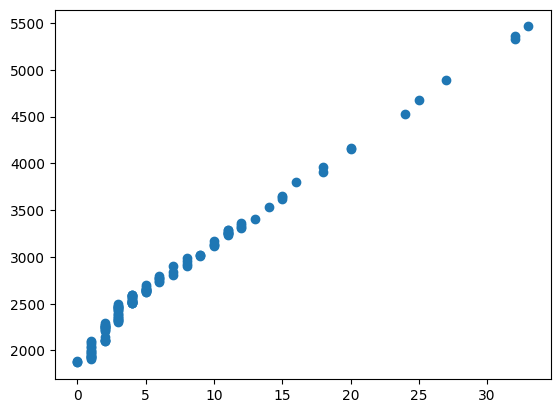

In [161]:
import seaborn as sns
plt.scatter(df3['Experiencia'],df3['Salario'])
